In [ ]:
# Article: Introduction to Quantum Programming with Qiskit
# reference: https://blog.mlq.ai/quantum-programming-with-qiskit/

In [1]:
import qiskit as q
%matplotlib inline

In [2]:
# build a 2 qubit, 2 classical circuit
circuit = q.QuantumCircuit(2,2)

In [3]:
# apply a NOT gate to qubit 0, currently 0,0
circuit.x(0)
# now 10

In [4]:
# apply a CNOT gate, which flips 2nd qubit value if first qubit is a 1
circuit.cx(0, 1)
# now 11

In [5]:
# take the measurement
circuit.measure([0, 1], [0, 1])

In [7]:
# visual representation of the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [8]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

In [9]:
from qiskit import transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def run_job(circuit):
    # Select the statevector simulator
    state_simulator = Aer.get_backend('statevector_simulator')

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(circuit, state_simulator)

    # Run the circuit on the statevector simulator
    job = state_simulator.run(transpiled_circuit)
    result = job.result()

    # Get statevector
    statevec = result.get_statevector()

    # Add measurement before running on QASM simulator
    circuit.measure_all()

    # Select the QASM simulator
    qasm_simulator = Aer.get_backend('qasm_simulator')

    # Transpile for the QASM simulator
    transpiled_circuit_qasm = transpile(circuit, qasm_simulator)

    # Run the circuit on the QASM simulator (with measurements)
    qasm_job = qasm_simulator.run(transpiled_circuit_qasm, shots=1024)
    qasm_result = qasm_job.result()

    # Get measurement counts
    counts = qasm_result.get_counts()

    return statevec, counts


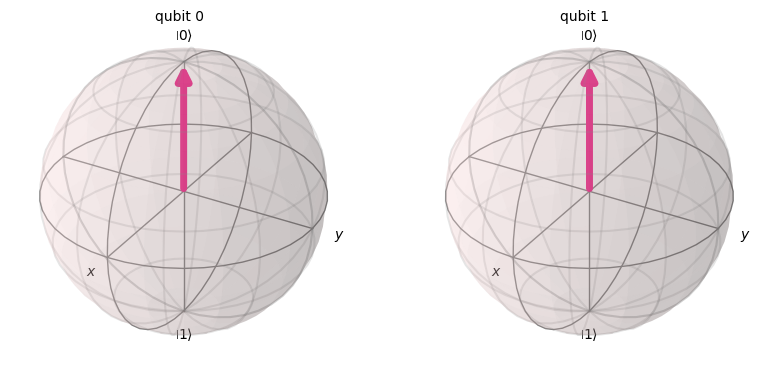

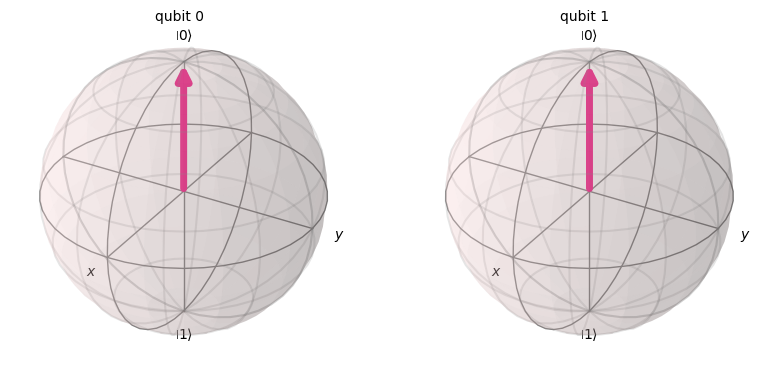

In [17]:
circuit = q.QuantumCircuit(2,2)
statevec, counts = run_job(circuit)
plot_bloch_multivector(statevec)

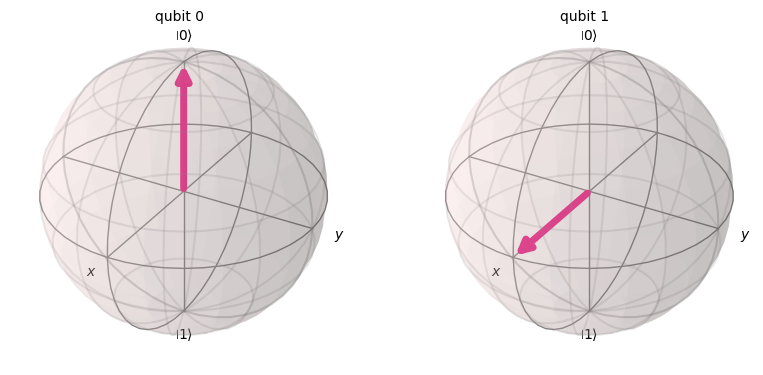

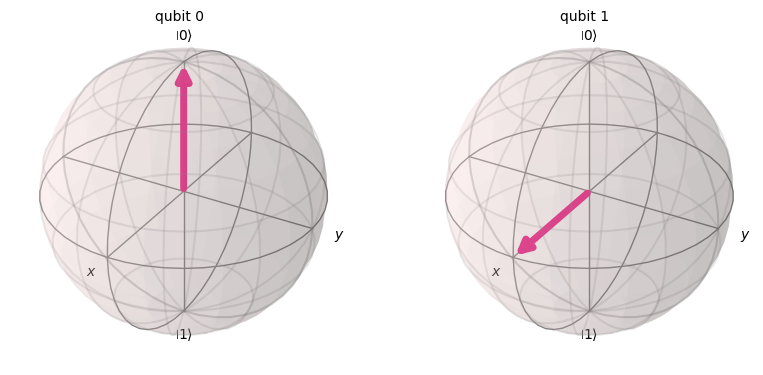

In [18]:
circuit = q.QuantumCircuit(2,2)

# put qubit 1 in superposition
circuit.h(1)

statevec, counts = run_job(circuit)
plot_bloch_multivector(statevec)

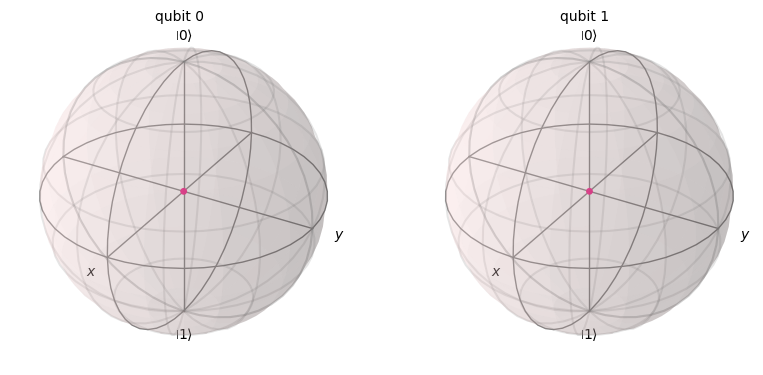

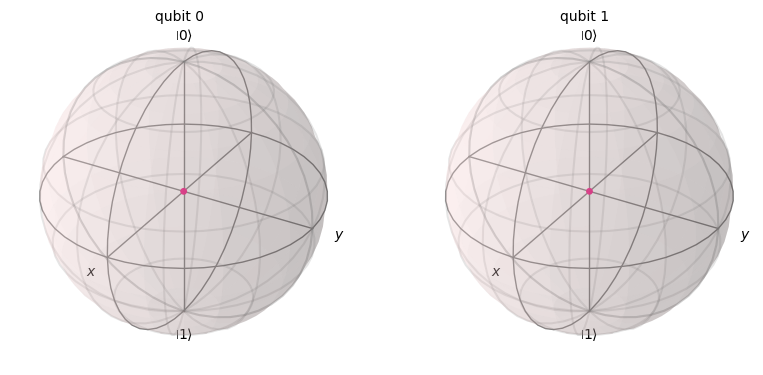

In [19]:
# put qubit 0 in superposition & CNOT on qubit 1
circuit.h(0)
circuit.cx(0,1)

statevec, counts = run_job(circuit)
plot_bloch_multivector(statevec)

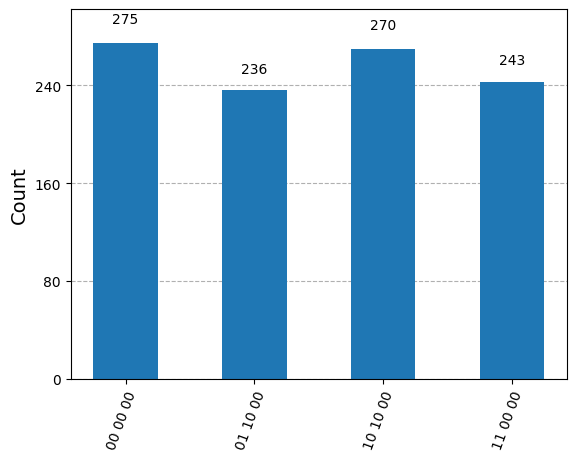

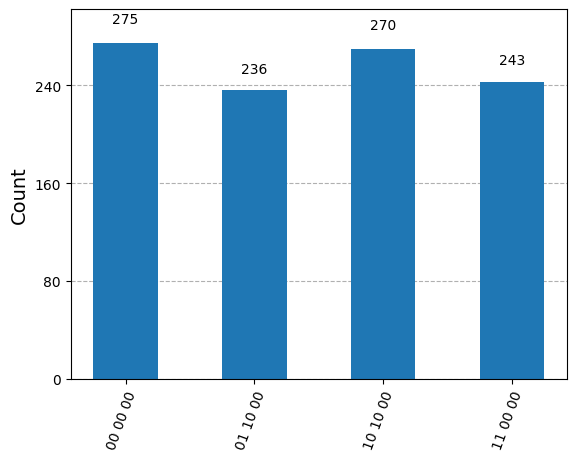

In [20]:
plot_histogram([counts])

Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Measurement Counts: {'00': 520, '11': 504}


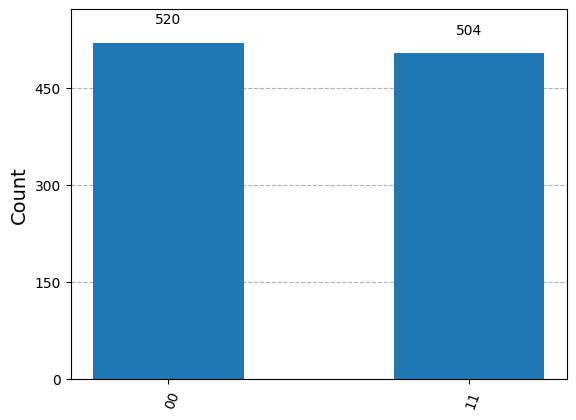

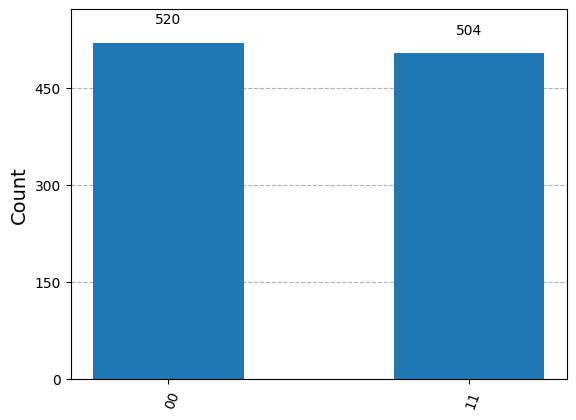

In [11]:
from qiskit import QuantumCircuit

# Create a simple circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Run the job
statevec, counts = run_job(qc)

# Print results
print("Statevector:", statevec)
print("Measurement Counts:", counts)

# Plot the histogram of measurement results
plot_histogram(counts)


In [ ]:
# NEXT PART - 3. Programming the Deutsch Jozsa Algorithm with Qiskit
""" 3.1 What is the Deutsch Jozsa algorithm?
The Deutsch Jozsa algorithm is a good place to start since it was the first example of a quantum algorithm that performs better than the best classical algorithm.

It is not necessarily the result of the algorithm that is important here, but seeing how a quantum circuit can consider all the possible inputs and can immediately respond with an output.

If you want to learn more details about the Deutsch Jozsa algorithm check out the Qiskit documentation on it, but here is a summary:

We have a hidden Boolean function which takes as input strings of bits and returns either 0 or 1
The question we want answered is if the output will be a constant output, meaning all 0's or all 1's, or a balanced output, meaning an even number of 0's and 1's
On a classical computer, if we had a 2 bit string it would take a least 2 queries in order to figure out if it is constant or balanced. As we increase the number of bits that we want to pass through this function it will take exponentially longer with each new bit
A quantum circuit, on the other hand, can make this determination in 1 query, regardless of how long the bit string is
As you can see the problem that we're solving is not that useful, but this algorithm really demonstrates the unique attributes that quantum circuits have that their classical counterparts do not. """

In [23]:
import math

# Create a new quantum circuit
c = q.QuantumCircuit(2, 2)

# Apply Ry gates to qubits
c.ry(math.pi / 4, 0)
c.ry(math.pi / 4, 1)

# Run the circuit on the statevector simulator
job = state_simulator.run(transpile(c, state_simulator))
orig_statevec = job.result().get_statevector()

# Add measurement to the circuit
c.measure([0, 1], [0, 1])

# Draw the circuit
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

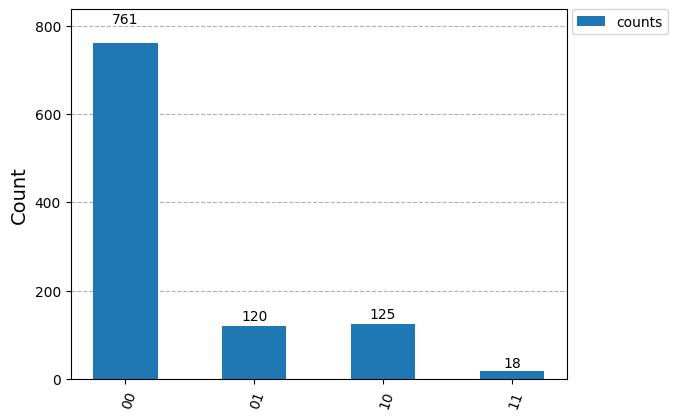

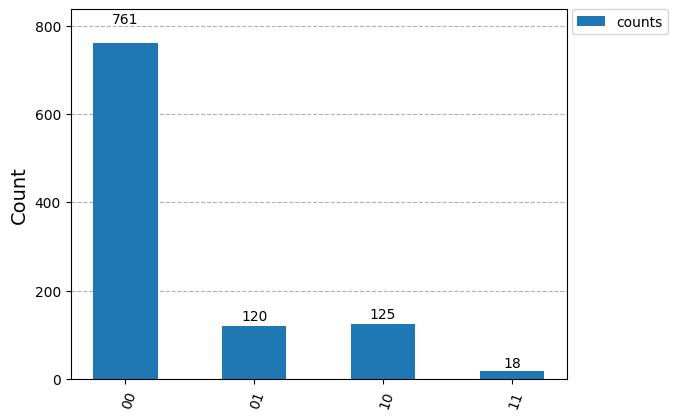

In [31]:


# Define the QASM simulator
qasm_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the QASM simulator
qasm_simulator = Aer.get_backend('qasm_simulator')
job = qasm_simulator.run(transpile(c, qasm_simulator))
#orig_counts = execute(c, backend=qasm_sim, shots=1024).result().get_counts()
orig_counts = job.result().get_counts()
# Plot the histogram of the results
plot_histogram([orig_counts], legend=['counts'])